# Project - College Placement Analysis and modelling

### Importing Libraries

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Loading the Dataset

In [2]:


college_placement = pd.read_csv('collegePlace.csv')

In [3]:
college_placement

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


### Exploratory Data Analysis (EDA)

In [4]:
# Displaying first 10 rows of the dataset
college_placement.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


In [5]:
# Checking for missing values
college_placement.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [6]:
# Summary statistics
college_placement.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


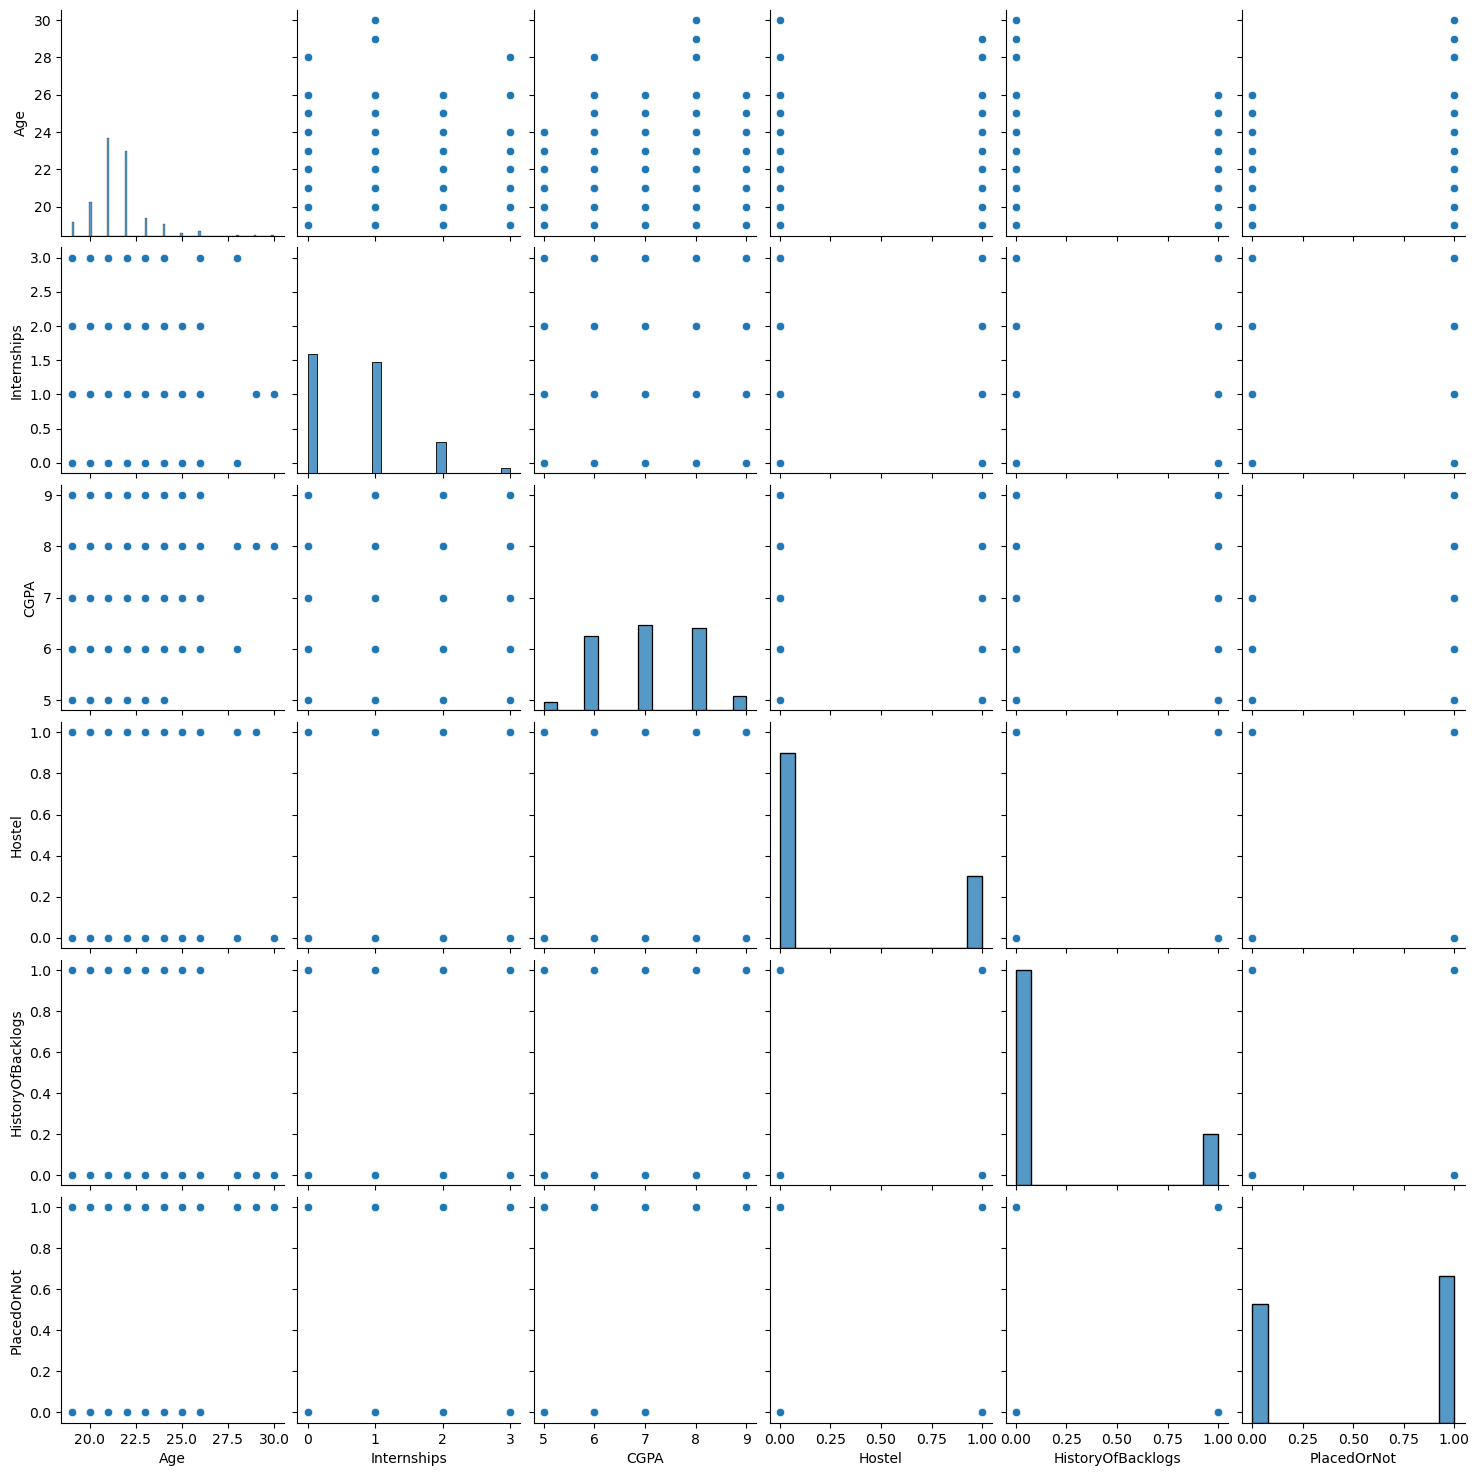

In [7]:
# Visualize distributions and relationships
sns.pairplot(college_placement)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7232\3058406711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(college_placement.corr(), annot=True)


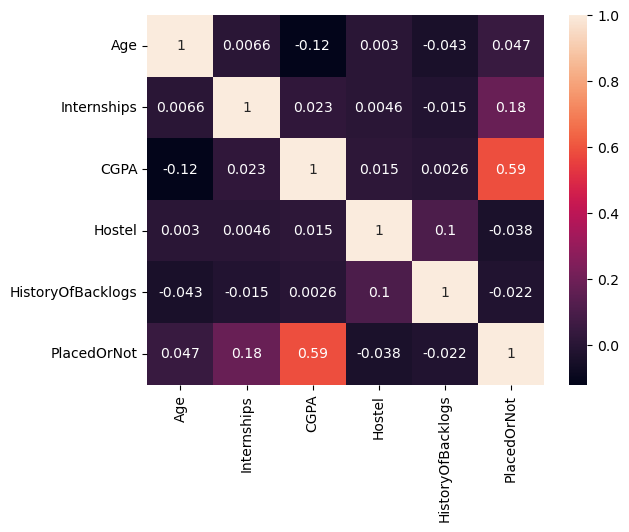

In [8]:
# Correlation heatmap
sns.heatmap(college_placement.corr(), annot=True)
plt.show()

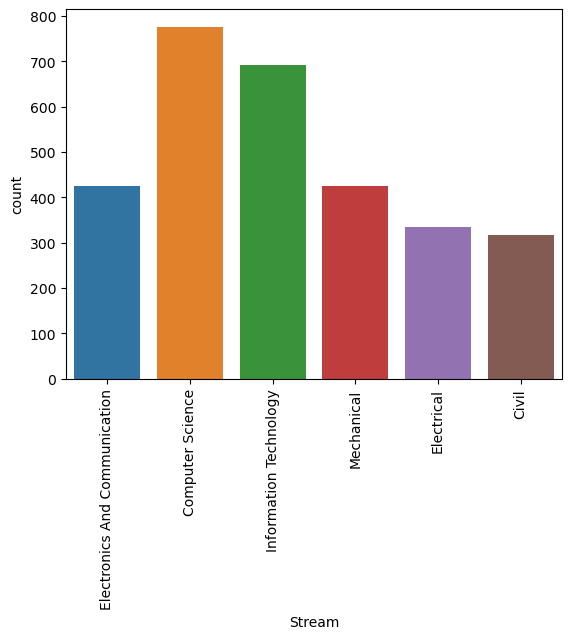

In [10]:
# Explore categorical variables
sns.countplot(x='Stream', data=college_placement)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

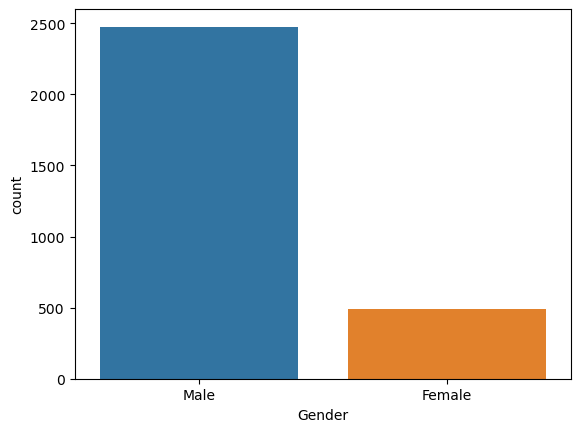

In [11]:
sns.countplot(x='Gender', data=college_placement)
plt.show()

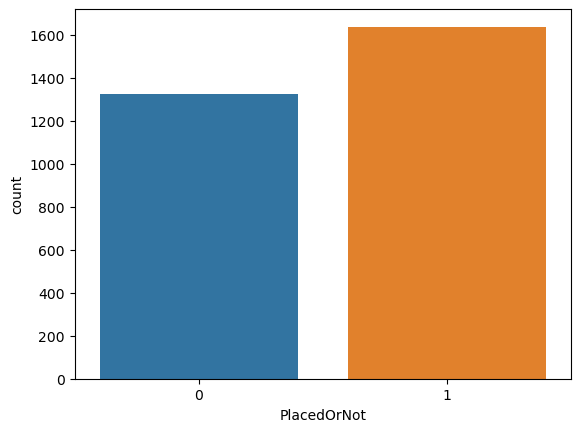

In [12]:
# Explore target variable
sns.countplot(x='PlacedOrNot', data=college_placement)
plt.show()

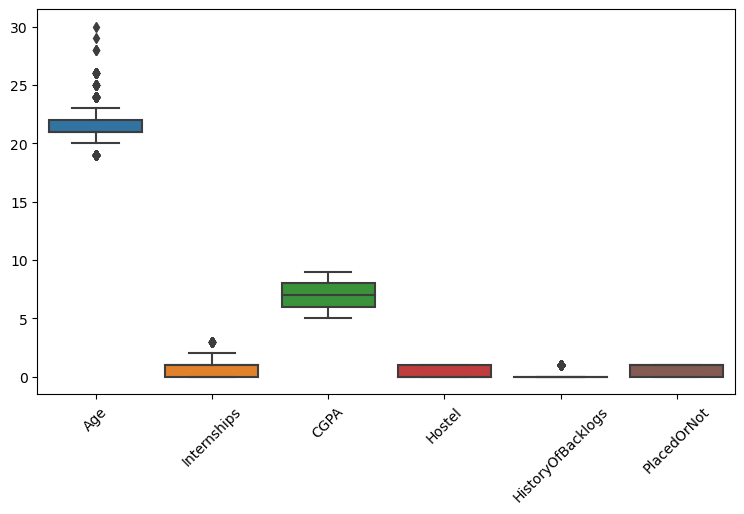

In [21]:
# Checking for outliers
plt.figure(figsize=(9,5))
sns.boxplot(data=college_placement)
plt.xticks(rotation=45)
plt.show()

In [27]:
# Calculating IDQ for Removing outliers
Q1 = college_placement.quantile(0.25)
Q3 = college_placement.quantile(0.75)
IQR = Q3 - Q1
IQR

C:\Users\Admin\AppData\Local\Temp\ipykernel_7232\3647223098.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = college_placement.quantile(0.25)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7232\3647223098.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = college_placement.quantile(0.75)


Age                  1.0
Internships          1.0
CGPA                 2.0
Hostel               1.0
HistoryOfBacklogs    0.0
PlacedOrNot          1.0
dtype: float64

In [28]:
# Removing outliers
college_placement = college_placement[~((college_placement < (Q1 - 1.5 * IQR)) | (college_placement > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7232\1459840985.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  college_placement = college_placement[~((college_placement < (Q1 - 1.5 * IQR)) | (college_placement > (Q3 + 1.5 * IQR))).any(axis=1)]


In [25]:
college_placement

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2,22,Female,Information Technology,1,6,0,0,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


#### Here we can see that before removing outliers, the dataset had 2966 rows × 8 columns and after removing the outliers the dataset is having only 2061 rows × 8 columns

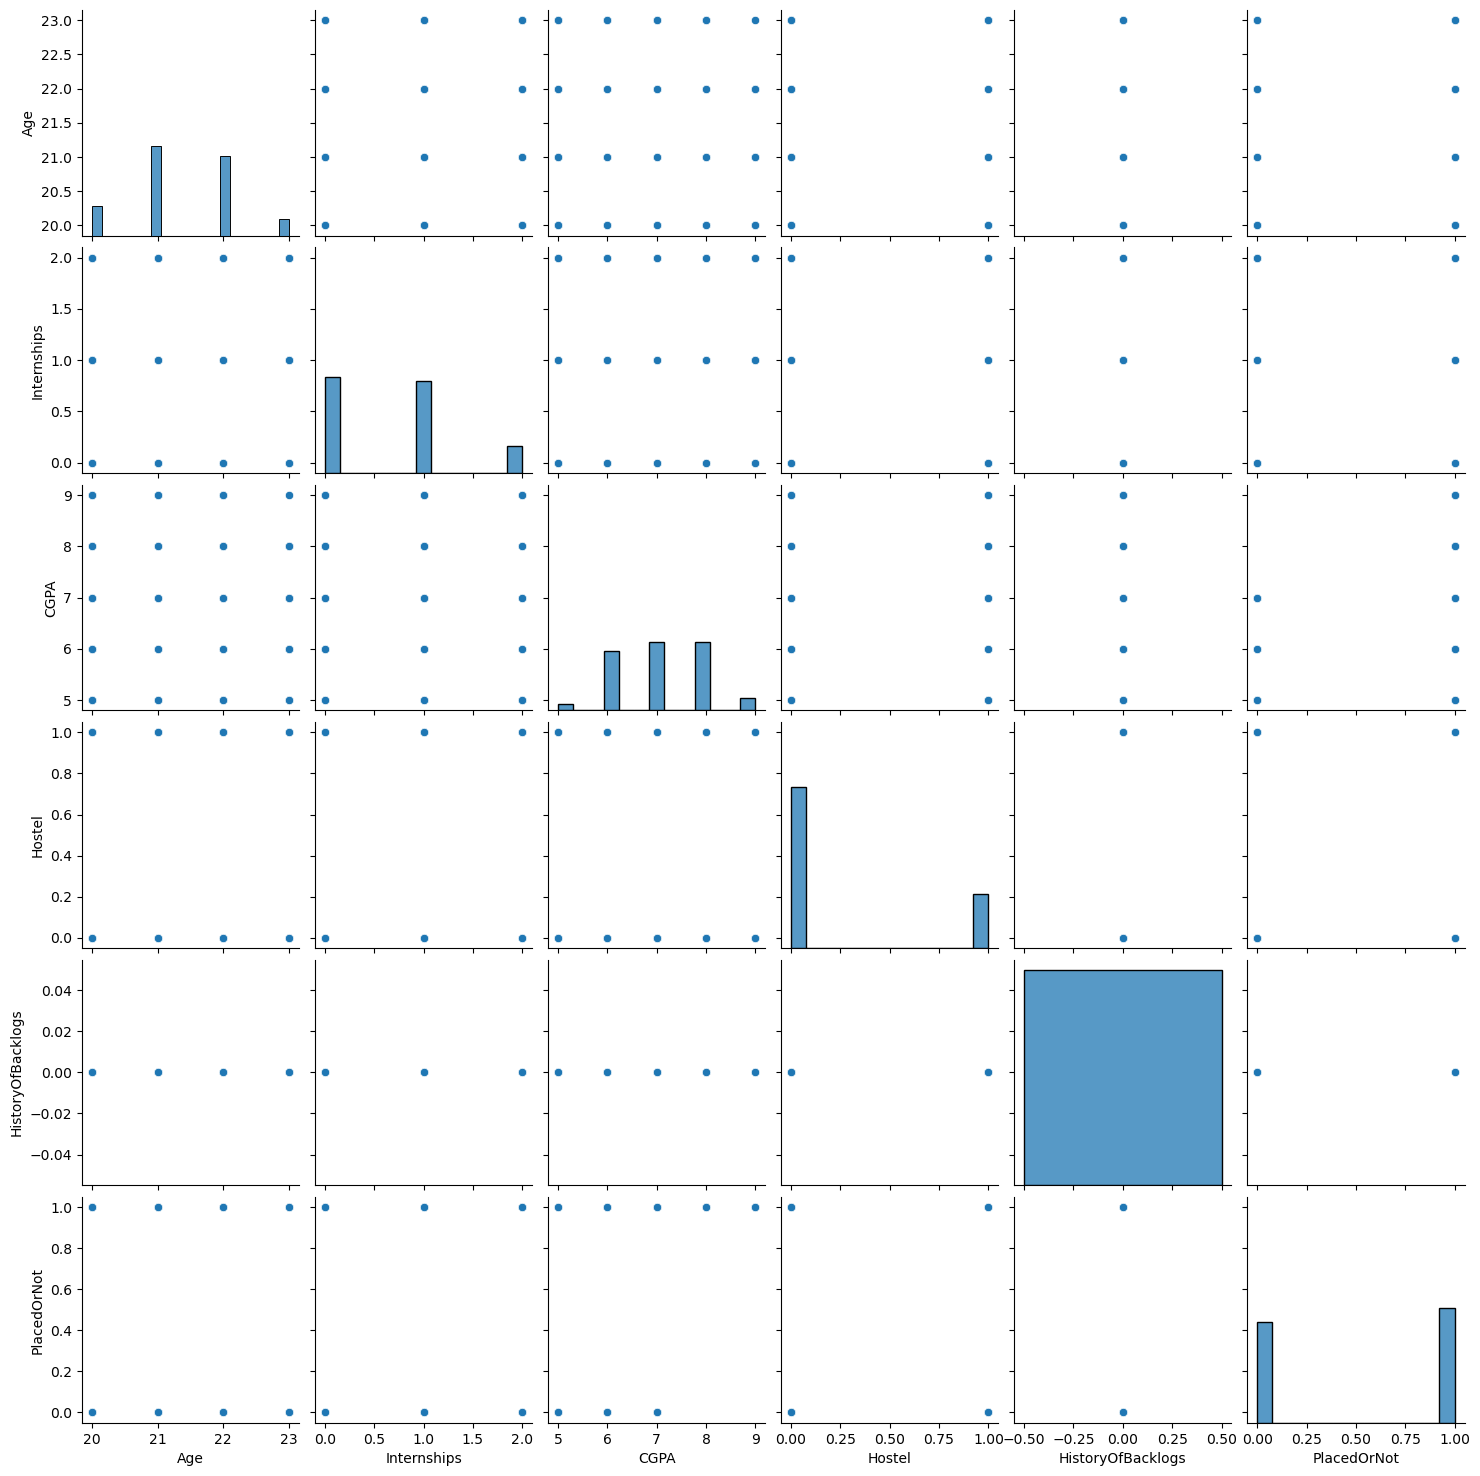

In [26]:
# EDA after removing outliers
sns.pairplot(college_placement)
plt.show()

### Data Preprocessing

In [31]:
college_placement.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2,22,Female,Information Technology,1,6,0,0,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1


In [32]:
# Converting categorical variables to numerical using one-hot encoding
college_placement = pd.get_dummies(college_placement, columns=['Stream', 'Gender'], drop_first=True)

In [33]:
college_placement.head(5)

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,Gender_Male
2,22,1,6,0,0,1,0,0,0,1,0,0
4,22,0,8,1,0,1,0,0,0,0,1,1
5,22,0,6,0,0,0,0,0,1,0,0,1
7,21,1,7,0,0,0,0,0,0,1,0,1
8,21,2,6,0,0,1,1,0,0,0,0,1


In [35]:
college_placement.shape

(2061, 12)

#### Here we could see the "Stream' and 'Gender' columns are encoded to 0's and 1's and dataframe shape is changed from (2061, 8) to (2061, 12)

### Now our target is to predict the placement , so target variable will be column 'PlacedOrNot' and remaining columns will be going to X as features when splitting the data

In [37]:
# Deciding the features and target variables
X = college_placement.drop('PlacedOrNot', axis=1)
y = college_placement['PlacedOrNot']

In [38]:
X

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,Gender_Male
2,22,1,6,0,0,0,0,0,1,0,0
4,22,0,8,1,0,0,0,0,0,1,1
5,22,0,6,0,0,0,0,1,0,0,1
7,21,1,7,0,0,0,0,0,1,0,1
8,21,2,6,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,0,7,0,0,0,0,0,1,0,1
2962,23,1,7,1,0,0,0,0,0,1,1
2963,22,1,7,0,0,0,0,0,1,0,1
2964,22,1,7,0,0,1,0,0,0,0,1


In [39]:
y

2       1
4       1
5       0
7       0
8       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2061, dtype: int64

In [40]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,Gender_Male
2501,21,0,8,1,0,0,0,0,0,1,1
2955,22,0,7,0,0,0,0,0,1,0,1
2261,21,0,8,0,0,0,0,0,0,0,1
86,21,0,8,0,0,1,0,0,0,0,1
2224,20,0,7,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2398,22,0,6,0,0,0,0,1,0,0,0
1513,23,2,7,0,0,0,1,0,0,0,1
1570,23,0,6,0,0,0,1,0,0,0,1
1832,21,2,6,0,0,1,0,0,0,0,1


In [42]:
X_test

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,Gender_Male
1840,23,0,6,0,0,0,0,1,0,0,1
813,22,1,8,0,0,0,0,0,0,1,0
1480,22,0,6,0,0,0,1,0,0,0,1
2632,20,1,8,1,0,0,0,0,0,1,0
37,22,1,8,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1725,21,0,6,0,0,0,0,1,0,0,1
2594,21,0,7,0,0,0,0,0,1,0,1
434,21,1,6,0,0,1,0,0,0,0,1
1932,21,1,7,0,0,0,0,0,0,0,1


In [43]:
y_train

2501    1
2955    0
2261    1
86      1
2224    0
       ..
2398    0
1513    0
1570    0
1832    1
1153    1
Name: PlacedOrNot, Length: 1648, dtype: int64

In [44]:
y_test

1840    0
813     1
1480    0
2632    1
37      1
       ..
1725    0
2594    0
434     0
1932    0
357     1
Name: PlacedOrNot, Length: 413, dtype: int64

In [45]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[-0.46510266, -0.99225495,  0.9361715 , ..., -0.57267907,
         2.42212028,  0.44656216],
       [ 0.76719507, -0.99225495, -0.09168368, ...,  1.7461787 ,
        -0.41286141,  0.44656216],
       [-0.46510266, -0.99225495,  0.9361715 , ..., -0.57267907,
        -0.41286141,  0.44656216],
       ...,
       [ 1.9994928 , -0.99225495, -1.11953887, ..., -0.57267907,
        -0.41286141,  0.44656216],
       [-0.46510266,  1.92520474, -1.11953887, ..., -0.57267907,
        -0.41286141,  0.44656216],
       [ 0.76719507, -0.99225495,  1.96402669, ..., -0.57267907,
        -0.41286141,  0.44656216]])

In [47]:
X_test

array([[ 1.9994928 , -0.99225495, -1.11953887, ..., -0.57267907,
        -0.41286141,  0.44656216],
       [ 0.76719507,  0.4664749 ,  0.9361715 , ..., -0.57267907,
         2.42212028, -2.23932993],
       [ 0.76719507, -0.99225495, -1.11953887, ..., -0.57267907,
        -0.41286141,  0.44656216],
       ...,
       [-0.46510266,  0.4664749 , -1.11953887, ..., -0.57267907,
        -0.41286141,  0.44656216],
       [-0.46510266,  0.4664749 , -0.09168368, ..., -0.57267907,
        -0.41286141,  0.44656216],
       [ 0.76719507, -0.99225495,  0.9361715 , ..., -0.57267907,
        -0.41286141,  0.44656216]])

#### Here we could see that X_train and X_test is transformed to an array after applying fit_transform

### Model Training

In [48]:
# Initializing and training the model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
log_reg_model

LogisticRegression()

### Model Evaluation

In [50]:
# Predicting y
y_pred = log_reg_model.predict(X_test)

In [51]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

In [52]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[152  44]
 [ 40 177]]


In [53]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       196
           1       0.80      0.82      0.81       217

    accuracy                           0.80       413
   macro avg       0.80      0.80      0.80       413
weighted avg       0.80      0.80      0.80       413



In [54]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7966101694915254


## Summary of Analysis and modelling:

#### We began by importing necessary libraries and loading the dataset. The dataset consists of various features such as Age, Gender, Stream, Internships, CGPA, Hostel, History of Backlogs, and the target variable PlacedOrNot.

#### Exploratory Data Analysis (EDA):
#### We started by examining the first few rows of the dataset to get a glimpse of the data structure. We then checked for missing values, explored summary statistics, and visualized distributions and relationships between variables using pairplots and heatmaps. Additionally, we explored categorical variables such as Stream and Gender, as well as the target variable PlacedOrNot.

#### Data Preprocessing:
#### We detected outliers using boxplots and calculated the Interquartile Range (IQR) to remove them. After removing outliers, we converted categorical variables (Stream and Gender) into numerical using one-hot encoding. We then split the dataset into features (X) and the target variable (y) and further split the data into training and testing sets. Finally, we standardized the features using StandardScaler.

#### Model Training:
#### We initialized and trained a Logistic Regression model using the training data.

#### Model Evaluation:
#### We evaluated the trained model using the testing data by predicting y values. We calculated the confusion matrix, classification report, and accuracy score to assess the model's performance.

#### Storytelling:
#### In this project, we analyzed a dataset related to college placement and built a predictive model to determine whether a student will be placed or not based on various factors. Through exploratory data analysis, we gained insights into the dataset's structure, distribution of variables, and relationships between them. We preprocessed the data by handling outliers and encoding categorical variables. After splitting the data, we trained a Logistic Regression model and evaluated its performance, achieving an accuracy of approximately 79.66%.

#### In conclusion, this project highlights the importance of data analysis and modeling in predicting college placement outcomes, which can provide valuable insights for students, educational institutions, and recruiters in the job market.